# Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

## **Conversion Rate Analysis Based on Income, Spending and Age**


### Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/Mini Project And VIX/Mini Project/Mini Project 3/dataset/CSV/marketing_campaign_data.csv')
df.head()


Mounted at /content/drive


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### Feature engineering

In [ ]:
import numpy as np

# Feature engineering : Conversion Rate
df['Conversion_Rate'] = df['Response']/df['NumWebVisitsMonth']
df['Conversion_Rate'] = df['Conversion_Rate']

# Feature engineering : Total Children
df['Total_Children'] = df['Kidhome']+df['Teenhome']

# Feature engineering : Total Purchases
df['Total_Purchases'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

# Feature engineering : Total Spend
df['Total_Spend'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

# Feature engineering : Age
df['Age'] = 2014 - df['Year_Birth']

# Feature engineering : Total Campain Accepted
df['Total_Accepted'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

# Feature engineering : Is Parents
df['Parents'] = np.where(df['Total_Children'] > 0, 1, 0)

df.head(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Conversion_Rate,Total_Children,Total_Purchases,Total_Spend,Age,Total_Accepted,Parents
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0.142857,0,25,1617000,57,0,0
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.000000,2,6,27000,60,0,1
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0.000000,0,21,776000,49,0,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.000000,1,8,53000,30,0,1
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0.000000,1,19,422000,33,0,1


### Grouping umur

<ipython-input-5-d00e8aefa65f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

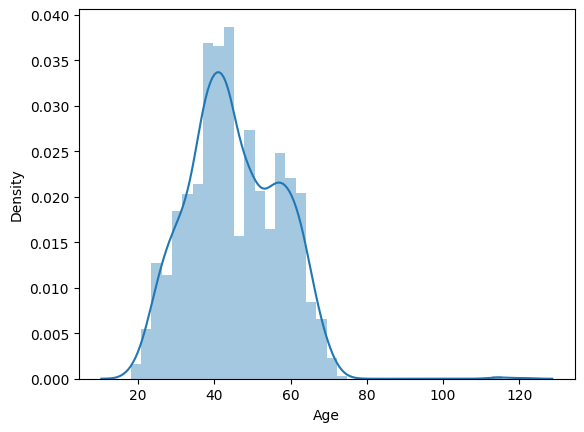

In [ ]:
# mencari sebaran umur
import seaborn as sns
sns.distplot(df['Age'])

In [ ]:
# Membuat fungsi untuk mengelompokkan umur
def Group_Age(Age):
    if 15 <= Age <= 18:
        return 'teens'
    elif 19 <= Age <= 35:
        return 'young_adults'
    elif 36 <= Age <= 50:
        return 'middle_adults'
    else:
        return 'older_adults'

# Menerapkan fungsi pada Age
df['Group_Age'] = df['Age'].apply(Group_Age)
df.head()


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Conversion_Rate,Total_Children,Total_Purchases,Total_Spend,Age,Total_Accepted,Parents,Group_Age
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0.142857,0,25,1617000,57,0,0,older_adults
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.000000,2,6,27000,60,0,1,older_adults
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0.000000,0,21,776000,49,0,0,middle_adults
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.000000,1,8,53000,30,0,1,young_adults
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0.000000,1,19,422000,33,0,1,young_adults


### EDA : conversion rate, recency, frequency, monetary, and income berdasarkan usia

#### rangkuman statistika

In [ ]:
# melihat informasi dasar dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
# mengelompokan data
categoricals = df.select_dtypes(include='object').columns.tolist()
numericals = df.select_dtypes(include=('int64', 'float64')).columns.tolist()

In [ ]:
# melihat statistika dasar dataset
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Conversion_Rate,Total_Children,Total_Purchases,Total_Spend,Age,Total_Accepted,Parents
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2229.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.043686,0.950446,14.862054,6.057982e+05,45.194196,0.297768,0.715179
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.142981,0.751803,7.677173,6.022493e+05,11.984069,0.678381,0.451430
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,0.000000,0.000000,5.000000e+03,18.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,0.000000,8.000000,6.875000e+04,37.000000,0.000000,0.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,1.000000,15.000000,3.960000e+05,44.000000,0.000000,1.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,1.000000,21.000000,1.045500e+06,55.000000,0.000000,1.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,1.000000,3.000000,44.000000,2.525000e+06,121.000000,4.000000,1.000000


In [ ]:
df[categoricals].describe()

,Education,Marital_Status,Dt_Customer,Group_Age
count,2240,2240,2240,2240
unique,5,6,663,4
top,S1,Menikah,31-08-2012,middle_adults
freq,1127,864,12,1019


#### Analisis Bivariate

##### kolerasi antar tabel

<ipython-input-11-a0b875cd8997>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

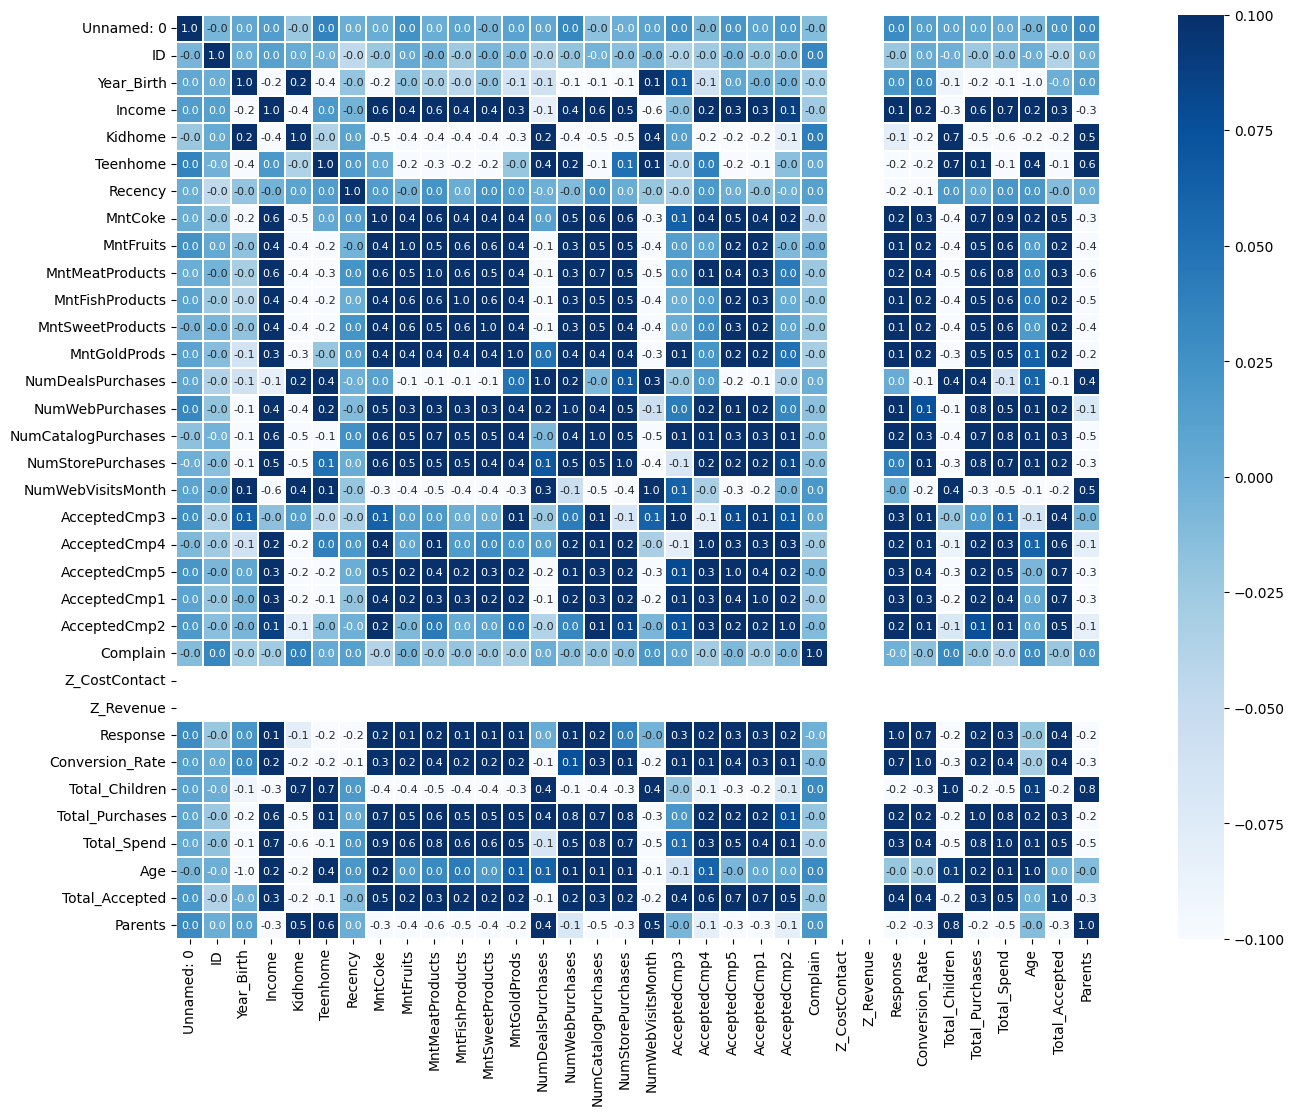

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
corrmat = df.corr()
sns.heatmap(corrmat, cmap='Blues', annot=True, fmt='.1f',
           vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={"fontsize":8})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

##### Income and conversion rate

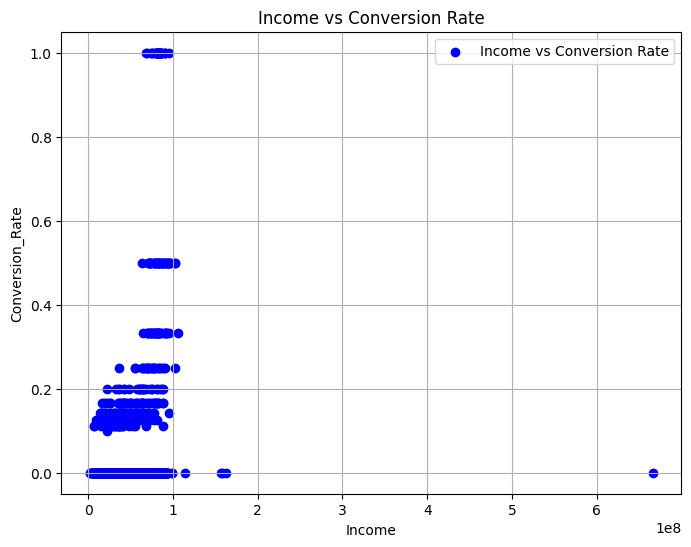

In [ ]:
import matplotlib.pyplot as plt

# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Income'], df['Conversion_Rate'], c='blue', marker='o', label='Income vs Conversion Rate')
plt.title('Income vs Conversion Rate')
plt.xlabel('Income')
plt.ylabel('Conversion_Rate')
plt.grid(True)
plt.legend()
plt.show()

##### Income and recency

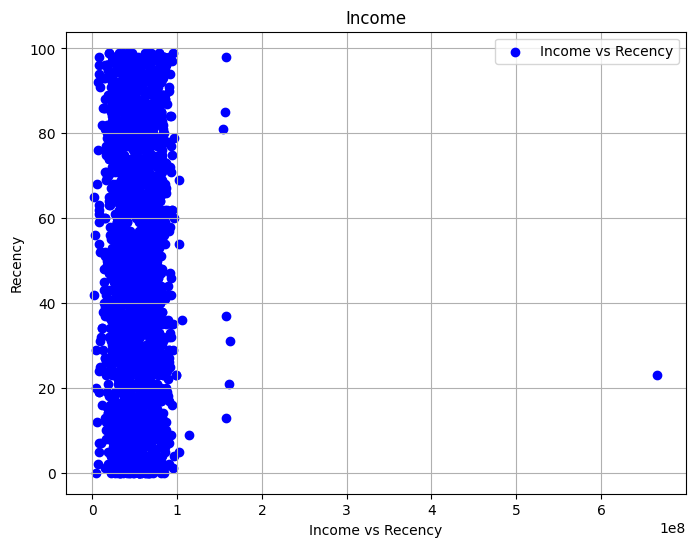

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Income'], df['Recency'], c='blue', marker='o', label='Income vs Recency')
plt.title('Income')
plt.xlabel('Income vs Recency')
plt.ylabel('Recency')
plt.grid(True)
plt.legend()
plt.show()

##### Income and fequency

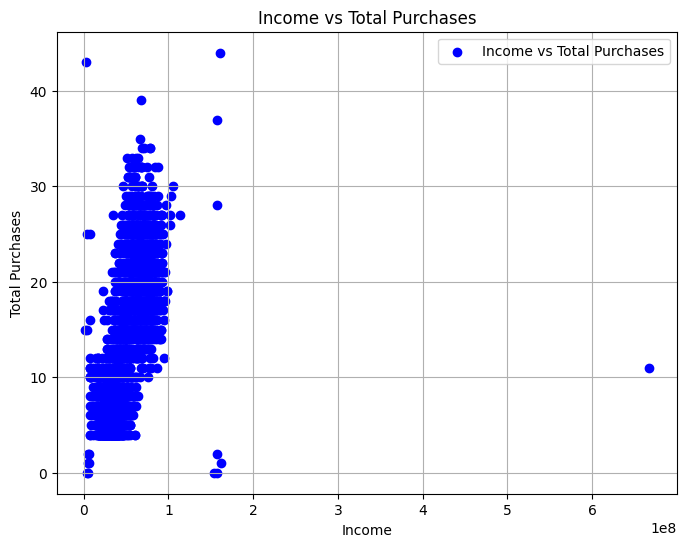

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Income'], df['Total_Purchases'], c='blue', marker='o', label='Income vs Total Purchases')
plt.title('Income vs Total Purchases')
plt.xlabel('Income')
plt.ylabel('Total Purchases')
plt.grid(True)
plt.legend()
plt.show()

##### Income and Monetary

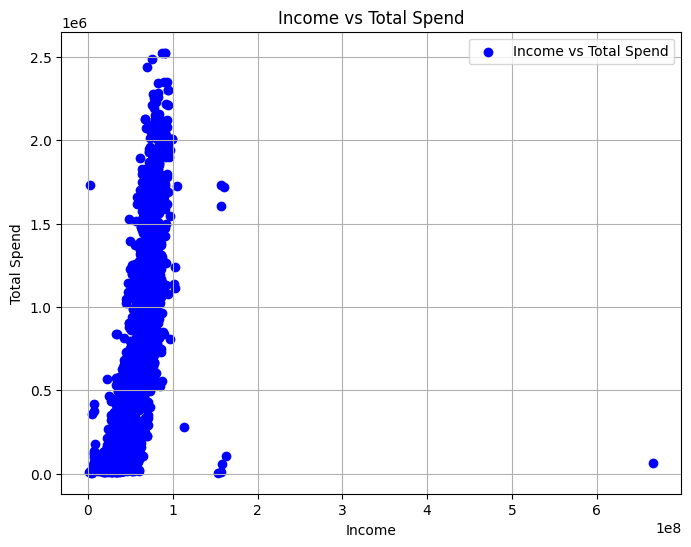

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Income'], df['Total_Spend'], c='blue', marker='o', label='Income vs Total Spend')
plt.title('Income vs Total Spend')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.grid(True)
plt.legend()
plt.show()

##### Usia and Conversion Rate

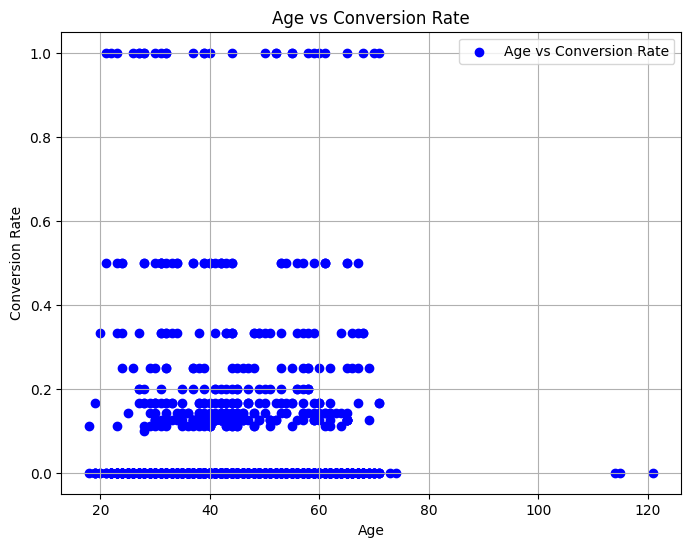

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Conversion_Rate'], c='blue', marker='o', label='Age vs Conversion Rate')
plt.title('Age vs Conversion Rate')
plt.xlabel('Age')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.legend()
plt.show()

##### Usia and recency

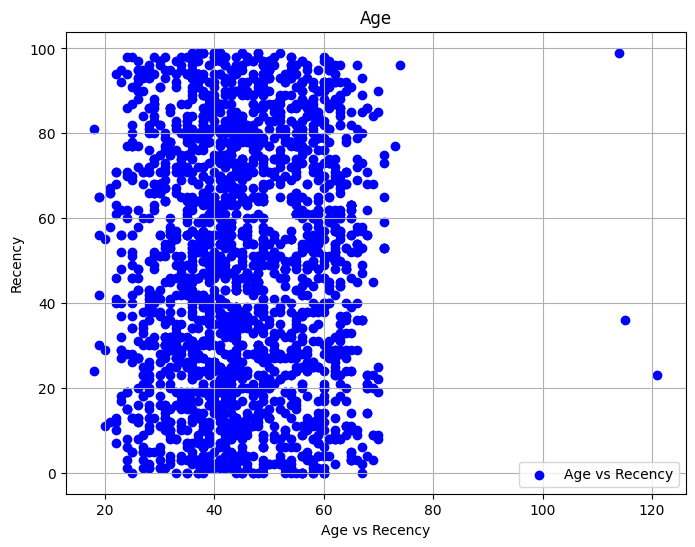

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Recency'], c='blue', marker='o', label='Age vs Recency')
plt.title('Age')
plt.xlabel('Age vs Recency')
plt.ylabel('Recency')
plt.grid(True)
plt.legend()
plt.show()

##### Usia and frequency

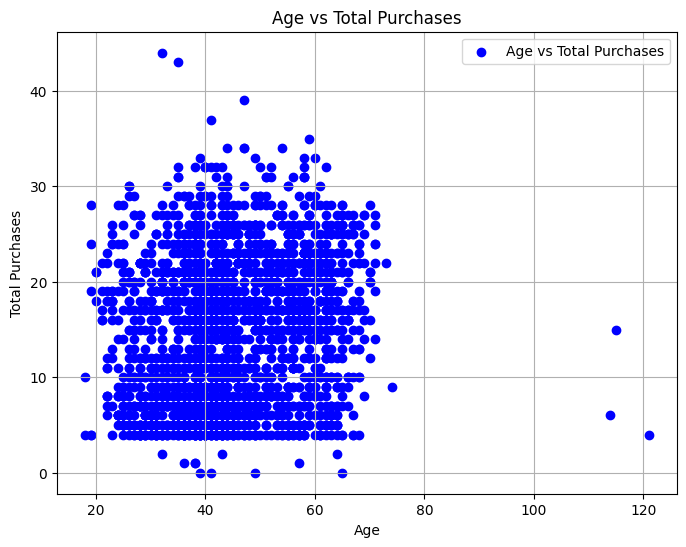

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Total_Purchases'], c='blue', marker='o', label='Age vs Total Purchases')
plt.title('Age vs Total Purchases')
plt.xlabel('Age')
plt.ylabel('Total Purchases')
plt.grid(True)
plt.legend()
plt.show()


##### Usia and Monetary

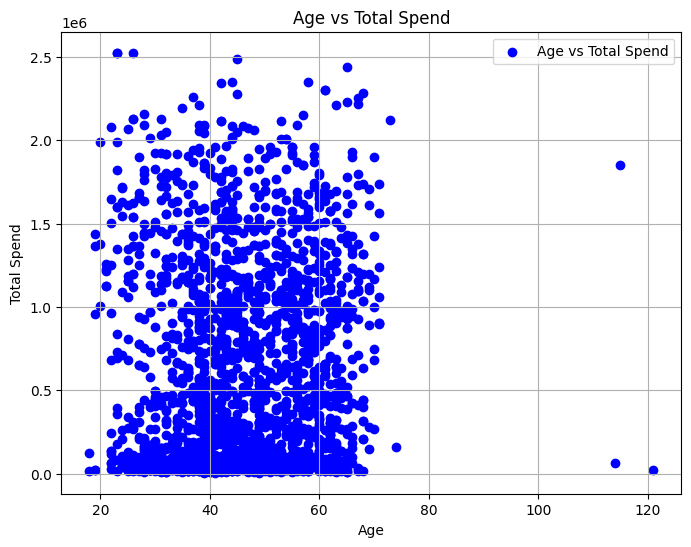

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Total_Spend'], c='blue', marker='o', label='Age vs Total Spend')
plt.title('Age vs Total Spend')
plt.xlabel('Age')
plt.ylabel('Total Spend')
plt.grid(True)
plt.legend()
plt.show()


##### Usia dengan Income

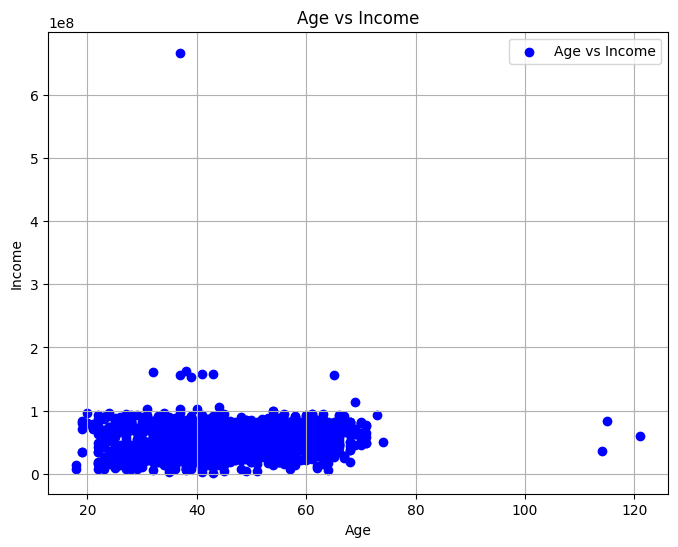

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Income'], c='blue', marker='o', label='Age vs Income')
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.legend()
plt.show()

#### Interpretasi EDA

- semakin besar income maka conversion rate, frequency dan monetary mengalami peningkatan. sementara untuk fitur recency menyebar secara merata untuk semua kategori income
- sementara itu covesion rate, recency, frequency, dan monetary menyebar secara merata untuk semua kategory usia


##**Data Cleaning & Preprocessing**

### Mengatasi data null dan duplicated

In [ ]:
# mengecek data null
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
Conversion_Rate        0
Total_Children         0
Total_Purchases        0
Total_Spend            0
Age                    0
Total_Accepted         0
Parents                0
dtype: int64

In [ ]:
# mengatasi data null
df['Income'] = df['Income'].fillna(df['Income'].mean())
df = df.dropna(subset=['Conversion_Rate'])
df.isnull().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Conversion_Rate        0
Total_Children         0
Total_Purchases        0
Total_Spend            0
Age                    0
Total_Accepted         0
Parents                0
Group_Age              0
dtype: int64

In [ ]:
# mengecek data duplikat
df.duplicated().sum()

0

In [ ]:
# mengecek jumlah data
df.shape

(2229, 38)

### Membuang data yang tidak diperlukan

In [ ]:
df = df.drop(['Unnamed: 0','Kidhome', 'Teenhome', 'Dt_Customer','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
              'AcceptedCmp5', 'Group_Age', 'Z_CostContact',	'Z_Revenue' ], axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Conversion_Rate,Total_Children,Total_Purchases,Total_Spend,Age,Total_Accepted,Parents
0,5524,1957,S1,Lajang,58138000.0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,1,0.142857,0,25,1617000,57,0,0
1,2174,1954,S1,Lajang,46344000.0,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0.000000,2,6,27000,60,0,1
2,4141,1965,S1,Bertunangan,71613000.0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0.000000,0,21,776000,49,0,0
3,6182,1984,S1,Bertunangan,26646000.0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0.000000,1,8,53000,30,0,1
4,5324,1981,S3,Menikah,58293000.0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0.000000,1,19,422000,33,0,1


In [ ]:
# menghapus outliers

df_clean= df[df['Income']<df['Income'].quantile(0.99)]
df_clean= df[df['Age']<df['Age'].quantile(0.99)]

In [ ]:
df_clean.shape

(2202, 26)

### Feature encoding

In [ ]:
mapping_education = { 'SMA' : 1,
                      'D3' : 2,
                      'S1' : 3,
                      'S2' : 4,
                      'S3' : 5 }

mapping_marital_status = { 'Lajang' : 1,
                      'Bertunangan' : 2,
                      'Menikah' : 3,
                      'Cerai' : 4,
                      'Janda' : 5,
                      'Duda' : 6 }

df_clean['Education'] = df_clean['Education'].map(mapping_education)
df_clean['Marital_Status'] = df_clean['Marital_Status'].map(mapping_marital_status)
df_clean.head(10)

<ipython-input-29-4d3af583eed1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Education'] = df_clean['Education'].map(mapping_education)
<ipython-input-29-4d3af583eed1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Marital_Status'] = df_clean['Marital_Status'].map(mapping_marital_status)


,ID,Year_Birth,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Conversion_Rate,Total_Children,Total_Purchases,Total_Spend,Age,Total_Accepted,Parents
0,5524,1957,3,1,58138000.0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,1,0.142857,0,25,1617000,57,0,0
1,2174,1954,3,1,46344000.0,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0.000000,2,6,27000,60,0,1
2,4141,1965,3,2,71613000.0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0.000000,0,21,776000,49,0,0
3,6182,1984,3,2,26646000.0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0.000000,1,8,53000,30,0,1
4,5324,1981,5,3,58293000.0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0.000000,1,19,422000,33,0,1
5,7446,1967,4,2,62513000.0,16,520000,42000,98000,0,42000,14000,2,6,4,10,6,0,0,0.000000,1,22,716000,47,0,1
6,965,1971,3,4,55635000.0,34,235000,65000,164000,50000,49000,27000,4,7,3,7,6,0,0,0.000000,1,21,590000,43,0,1
7,6177,1985,5,3,33454000.0,32,76000,10000,56000,3000,1000,23000,2,4,0,4,8,0,0,0.000000,1,10,169000,29,0,1
8,4855,1974,5,2,30351000.0,19,14000,0,24000,3000,3000,2000,1,3,0,2,9,0,1,0.111111,1,6,46000,40,0,1
9,5899,1950,5,2,5648000.0,68,28000,0,6000,1000,1000,13000,1,1,0,0,20,0,0,0.000000,2,2,49000,64,1,1


### Standarisasi Feature

In [ ]:
from sklearn.preprocessing import StandardScaler

# Membuat objek StandardScaler
scaler = StandardScaler()

# Standarisasi fitur dengan StandardScaler
fitur_StandardScaler = scaler.fit_transform(df_clean)

# Membuat DataFrame baru dengan fitur yang sudah di-standarisasi
df_scaled = pd.DataFrame(fitur_StandardScaler, columns=df.columns)

df_scaled.head()

,ID,Year_Birth,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Conversion_Rate,Total_Children,Total_Purchases,Total_Spend,Age,Total_Accepted,Parents
0,-0.018945,-1.063729,-0.449464,-1.410307,0.255531,0.308465,0.993142,1.576416,1.746799,2.494725,1.487308,0.850632,0.349265,1.454508,2.607230,-0.551910,0.681426,-0.093293,2.390275,0.709723,-1.288910,1.337633,1.698449,1.063729,-0.436435,-1.626559
1,-1.051583,-1.325491,-0.449464,-1.410307,-0.222688,-0.383190,-0.865741,-0.633450,-0.717421,-0.644573,-0.630891,-0.731338,-0.176783,-1.132590,-0.570316,-1.171965,-0.152649,-0.093293,-0.418362,-0.305532,1.383576,-1.153083,-0.953016,1.325491,-0.436435,0.614795
2,-0.445255,-0.365698,-0.449464,-0.457116,0.801911,-0.798184,0.370535,0.585786,-0.165253,1.368271,-0.143949,-0.036815,-0.702831,1.454508,-0.217256,1.308253,-0.569686,-0.093293,-0.418362,-0.305532,-1.288910,0.813272,0.296008,0.365698,-0.436435,-1.626559
3,0.183884,1.292127,-0.449464,-0.457116,-1.021396,-0.798184,-0.865741,-0.557248,-0.653534,-0.496842,-0.582197,-0.750631,-0.176783,-0.763004,-0.923377,-0.551910,0.264389,-0.093293,-0.418362,-0.305532,0.047333,-0.890902,-0.909659,-1.292127,-0.436435,0.614795
4,-0.080595,1.030365,1.551990,0.496075,0.261816,1.553446,-0.383147,0.433382,-0.206324,0.167951,0.002134,-0.557707,1.401361,0.345752,0.135805,0.068144,-0.152649,-0.093293,-0.418362,-0.305532,0.047333,0.551091,-0.294319,-1.030365,-0.436435,0.614795


##**Data Modeling**

### Menentukan jumlah cluster

In [ ]:
# memilih fitur
kolom_fit = ['Recency', 'Total_Purchases',	'Total_Spend']
df_fit = df_scaled[kolom_fit]
df_fit.head()

,Recency,Total_Purchases,Total_Spend
0,0.308465,1.337633,1.698449
1,-0.383190,-1.153083,-0.953016
2,-0.798184,0.813272,0.296008
3,-0.798184,-0.890902,-0.909659
4,1.553446,0.551091,-0.294319


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

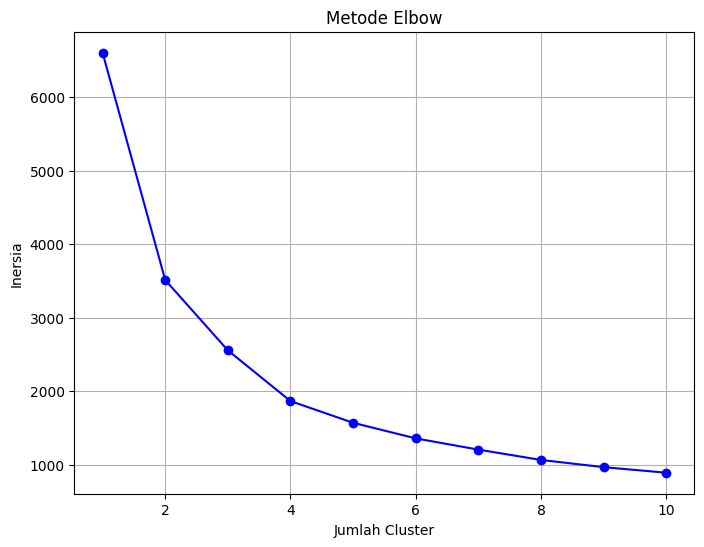

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Mengambil data atau menghasilkan data acak
data = df_scaled

# Inisialisasi daftar untuk menyimpan nilai inersia (inertia) untuk berbagai jumlah cluster
inertia_values = []

# Mencoba berbagai jumlah cluster dari 1 hingga k (misalnya, 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_fit)
    inertia_values.append(kmeans.inertia_)

# Membuat plot Elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.grid(True)
plt.show()

### Clustering

In [ ]:
# Fit model clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_fit)
df_fit['Cluster'] = kmeans.labels_
df_clean['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-31-35fd245f2d31>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fit['Cluster'] = kmeans.labels_
<ipython-input-31-35fd245f2d31>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = kmeans.labels_


In [ ]:
# menganalisa jumlah anggota masing-masing cluster
cluster_sizes = df_fit['Cluster'].value_counts()
cluster_sizes

1    911
0    662
2    629
Name: Cluster, dtype: int64

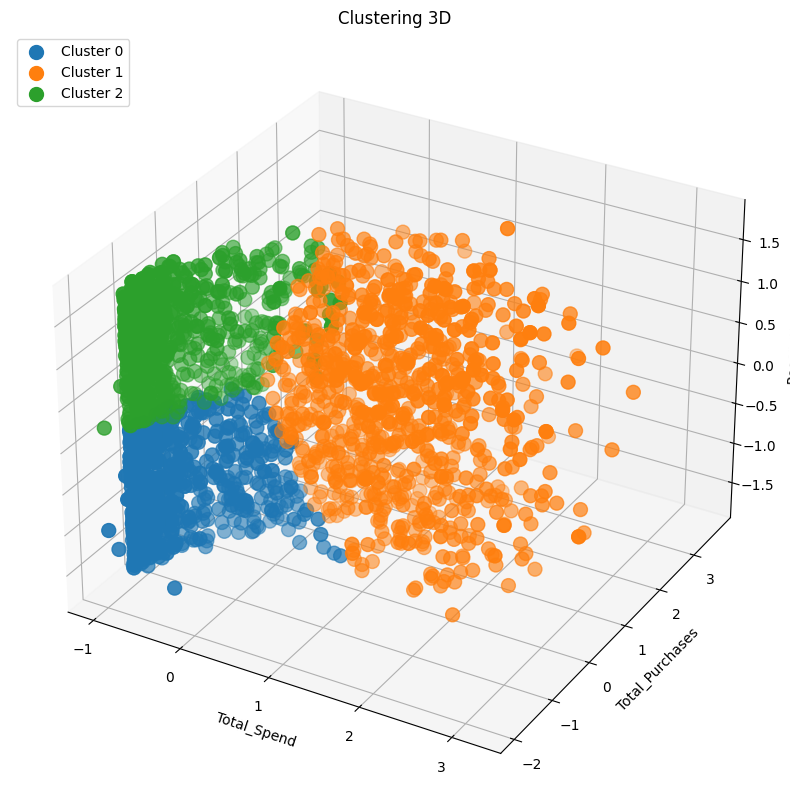

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Impor komponen 3D

# Buat gambar 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x_label = 'Total_Spend'
y_label = 'Total_Purchases'
z_label = 'Recency'

# Mengganti 'df_fit' dengan nama DataFrame Anda
for c, rows in df_fit.groupby('Cluster'):
    ax.scatter(rows[x_label], rows[y_label], rows[z_label], s=100, label="Cluster %s" % c)

ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_zlabel(z_label)
ax.set_title('Clustering 3D')
ax.legend(loc="upper left")
plt.show()


### Evaluasi Model

In [ ]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score
silhouette_avg = silhouette_score(df_fit, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5006619007077858


##**Customer personality analysis for marketing retargeting**

In [ ]:
cluster_means = df_clean.groupby('Cluster').mean()
cluster_means

,ID,Year_Birth,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Conversion_Rate,Total_Children,Total_Purchases,Total_Spend,Age,Total_Accepted,Parents
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5778.225076,1970.753776,3.410876,2.510574,3.956369e+07,23.791541,81554.380665,7882.175227,35155.589124,11293.051360,7054.380665,21425.981873,2.157100,2.676737,0.815710,3.779456,6.220544,0.012085,0.138973,0.019674,1.172205,9.429003,1.643656e+05,43.246224,0.110272,0.861027
1,5483.281010,1967.498353,3.545554,2.514819,6.961753e+07,49.151482,610074.643249,51097.694841,339212.952799,72852.908891,53556.531284,74176.728869,2.491767,5.995609,5.062569,8.600439,4.175631,0.007684,0.229418,0.085275,0.636663,22.150384,1.200971e+06,46.501647,0.567508,0.524698
2,5530.569157,1969.998410,3.349762,2.395866,3.899865e+07,75.593005,86475.357711,8502.384738,43082.670906,11796.502385,9222.575517,23731.319555,2.298887,2.728140,0.965024,3.801272,6.190779,0.006359,0.042925,0.006292,1.220986,9.793323,1.828108e+05,44.001590,0.101749,0.874404


### Interpretasi hasil cluster pada masing-masing feature

**Cluster 0**, yang merupakan cluster terbesar di antara semua cluster yang ada, terdiri dari sebanyak 911 pelanggan. <br>
Berikut adalah beberapa informasi kunci yang menggambarkan cluster ini dengan lebih rinci:
- **Pendapatan Rata-rata**: Anggota dari Cluster 0 memiliki rata-rata pendapatan sekitar 39.563.690. angka ini menempatkan cluster ini dalam urutan kedua terbesar dalam hal income
- **Recency** : Cluster ini memiliki waktu recency tersingkat, yaitu sebesar 23.791541.
- **Frequensi Pembelian**: Frequensi pembelian pada cluster ini relatif rendah, seperti yang terlihat dari rata-rata Total_Purchases yang hanya sekitar 9.429003.
- **Nilai Moneter**: Cluster ini memiliki nilai moneter paling rendah dibandingkan dengan cluster lainnya, yang dapat dilihat dari rata-rata Total_Spend hanya sebesar 164.365,6.
- **Aktivitas Online**: Meskipun memiliki jumlah kunjungan ke situs web tertinggi (NumWebVisitsMonth), cluster ini menempati urutan kedua dalam merespon campaign marketing.
- **Produk Dominan**: Barang-barang yang paling diminati oleh anggota cluster ini adalah MntCoke, MntMeatProducts, MntFishProducts, dan MntGoldProds.
- **Penggunaan Kupon Diskon**: Penggunaan kupon diskon pada cluster ini paling rendah di antara semua cluster lainnya, yaitu sebesar 2.157100.
- **Pilihan Belanja**: Cluster ini cenderung memilih antara belanja online atau kunjungan langsung ke toko fisik.
- **Profil Demografis**: Mayoritas anggota cluster ini adalah orang tua yang sudah memiliki anak.
<br>
<br>

**Cluster 1**, yang merupakan cluster terbesar kedua di antara semua cluster yang ada, terdiri dari 662 pelanggan. <br>
Berikut adalah informasi terperinci tentang Cluster 1:
-	**Pendapatan Rata-rata**: Anggota Cluster 1 memiliki pendapatan rata-rata sekitar 69.617.530. Ini menjadikan cluster ini sebagai cluster dengan pendapatan tertinggi di antara semua cluster.
-	**Recency**: Cluster ini memiliki waktu recency tersingkat kedua, yaitu sebesar 49.151482.
-	**Frequensi Pembelian**: Cluster ini menduduki peringkat pertama dalam hal frequensi pembelian, dengan Total_Purchases sebesar 22.150384.
-	**Nilai Moneter**: Cluster ini memiliki nilai moneter tertinggi dibandingkan dengan cluster lainnya, yang dapat dilihat dari rata-rata Total_Spend sebesar 1.200.971.
-	**Aktivitas Online**: Meskipun memiliki jumlah kunjungan ke situs web terendah (NumWebVisitsMonth), cluster ini menduduki peringkat pertama dalam hal merespon campaign marketing.
-	**Produk Dominan**: Anggota cluster ini memiliki nilai transaksi yang signifikan untuk semua lini produk.
-	**Penggunaan Kupon Diskon**: Penggunaan kupon diskon pada cluster ini paling tinggi di antara semua cluster lainnya, yaitu sebesar 2.491767.
-	**Pilihan Belanja**: Cluster ini cenderung memilih antara belanja online, katalog, dan kunjungan langsung ke toko fisik.
-	**Profil Demografis**: Sebagian anggota cluster ini bukanlah orang tua.
<br>
<br>

**Cluster 2**, yang merupakan cluster terkecil di antara semua cluster yang ada, terdiri dari 629 pelanggan.Berikut adalah informasi terperinci tentang Cluster 2: <br>
- **Pendapatan Rata-rata**: Anggota Cluster 2 memiliki pendapatan rata-rata sekitar 38.998.650. Ini menjadikan cluster ini sebagai cluster dengan pendapatan terendah di antara semua cluster.
-	**Recency**: Cluster ini memiliki waktu recency terlama, yaitu sebesar 75.593005.
-	**Frequensi Pembelia**n: Cluster ini menduduki peringkat kedua dalam hal frequensi pembelian, dengan Total_Purchases sebesar 9.793323.
-	**Nilai Moneter**: Cluster ini memiliki nilai moneter tertinggi kedua dibandingkan dengan cluster lainnya, yang dapat dilihat dari rata-rata Total_Spend sebesar 182.810,8.
-	**Aktivitas Online**: Meskipun memiliki jumlah kunjungan ke situs web (NumWebVisitsMonth) tertinggi kedua, cluster ini jarang merespon campaign marketing.
-	**Produk Dominan**: Anggota cluster ini memiliki nilai transaksi yang signifikan pada MntCoke, MntMeatProducts, MntFishProducts, dan MntGoldProds.
-	**Penggunaan Kupon Diskon**: Penggunaan kupon diskon pada cluster ini menempati urutan kedua di antara semua cluster lainnya, yaitu sebesar 2.298887.
-	**Pilihan Belanja**: Cluster ini cenderung memilih antara belanja online dan kunjungan langsung ke toko fisik.
-	**Profil Demografis**: Mayoritas anggota cluster ini adalah orang tua yang sudah memiliki anak.





### Memilih cluster untuk marketing retargeting

Saya merekomendasikan untuk memusatkan upaya pemasaran pada **Cluster 1** karena memiliki karakteristik yang sangat menarik. Anggota **Cluster 1** memiliki pendapatan rata-rata yang tinggi, menunjukkan kapasitas finansial yang signifikan untuk melakukan pembelian. Mereka juga menduduki peringkat pertama dalam hal frekuensi pembelian, mencerminkan loyalitas dan aktivitas yang kuat. Nilai moneter mereka sangat tinggi, dan mereka menunjukkan respons yang tinggi terhadap kampanye pemasaran, meskipun jumlah kunjungan situs web mereka lebih rendah. Cluster ini memiliki potensi cross-selling yang signifikan dan aktif menggunakan kupon diskon. Dengan menjaga pelanggan dalam cluster ini dan menarik lebih banyak pelanggan dengan profil serupa, agar perusahaan dapat mencapai pertumbuhan bisnis yang signifikan.







### Menghitung potential impact dari hasil marketing retargeting dari cluster yang ada

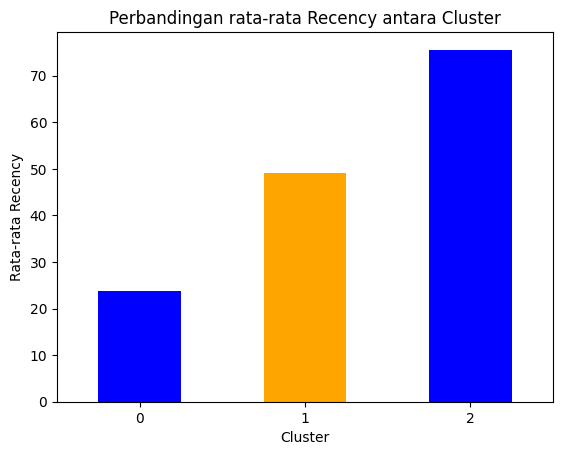

In [ ]:
# Menghitung rata-rata Recency untuk masing-masing cluster
rata_rata_recency = df_clean.groupby('Cluster')['Recency'].mean()

# Membuat daftar warna yang berbeda untuk setiap bar
colors = ['blue', 'orange']

# Membuat bar chart dengan warna yang berbeda
rata_rata_recency.plot(kind='bar', xlabel='Cluster', ylabel='Rata-rata Recency', title='Perbandingan rata-rata Recency antara Cluster', color=colors)
plt.xticks(rotation=0)  # Untuk mengatur label cluster pada sumbu X agar tidak condong
plt.show()


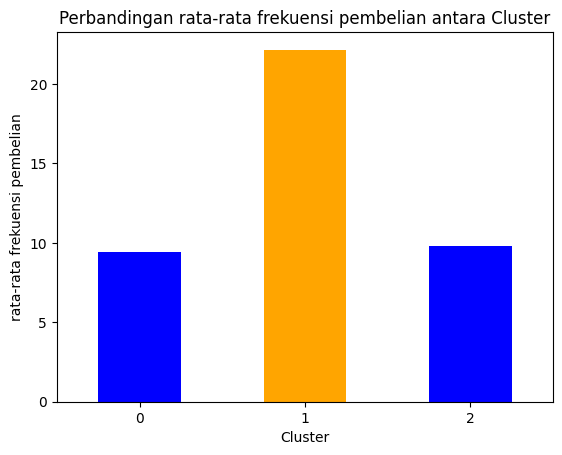

In [ ]:
# Menghitung rata-rata frekuensi pembelian untuk masing-masing cluster
rata_rata_frekuensi = df_clean.groupby('Cluster')['Total_Purchases'].mean()

# Membuat daftar warna yang berbeda untuk setiap bar
colors = ['blue', 'orange']

# Membuat bar chart dengan warna yang berbeda
rata_rata_frekuensi.plot(kind='bar', xlabel='Cluster', ylabel='rata-rata frekuensi pembelian', title='Perbandingan rata-rata frekuensi pembelian antara Cluster', color=colors)
plt.xticks(rotation=0)  # Untuk mengatur label cluster pada sumbu X agar tidak condong
plt.show()

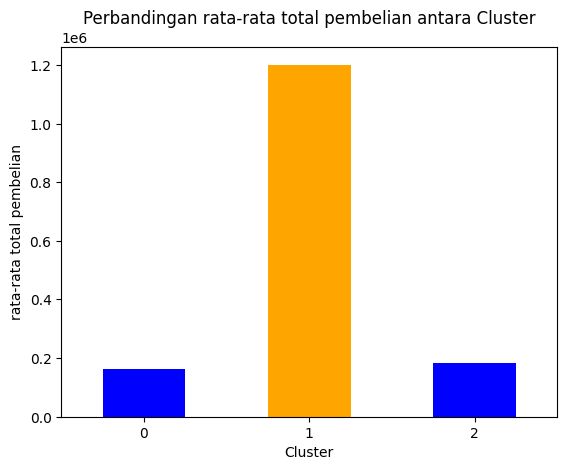

In [ ]:
# Menghitung rata-rata total pembelian pembelian untuk masing-masing cluster
rata_rata_total_spend = df_clean.groupby('Cluster')['Total_Spend'].mean()

# Membuat daftar warna yang berbeda untuk setiap bar
colors = ['blue', 'orange']

# Membuat bar chart dengan warna yang berbeda
rata_rata_total_spend.plot(kind='bar', xlabel='Cluster', ylabel='rata-rata total pembelian', title='Perbandingan rata-rata total pembelian antara Cluster', color=colors)
plt.xticks(rotation=0)  # Untuk mengatur label cluster pada sumbu X agar tidak condong
plt.show()

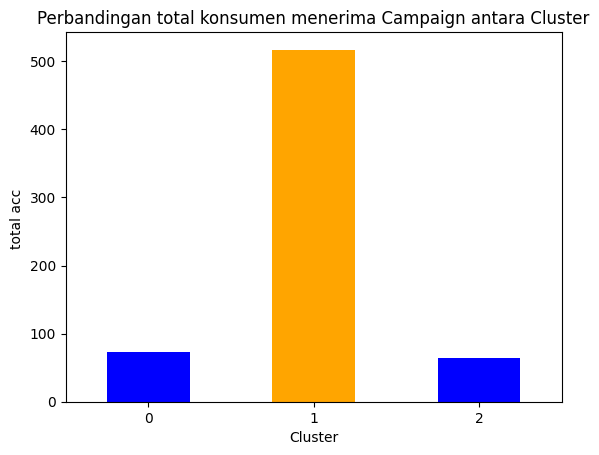

In [ ]:
# Menghitung total konsumen menerima Campaign untuk masing-masing cluster
total_accepted = df_clean.groupby('Cluster')['Total_Accepted'].sum()

# Membuat daftar warna yang berbeda untuk setiap bar
colors = ['blue', 'orange']

# Membuat bar chart dengan warna yang berbeda
total_accepted.plot(kind='bar', xlabel='Cluster', ylabel='total acc ', title='Perbandingan total konsumen menerima Campaign antara Cluster', color=colors)
plt.xticks(rotation=0)  # Untuk mengatur label cluster pada sumbu X agar tidak condong
plt.show()

In [ ]:
total_accepted = df_clean.groupby('Cluster')['Total_Accepted'].sum()
total_accepted

Cluster
0     73
1    517
2     64
Name: Total_Accepted, dtype: int64

In [ ]:
73+517+64

654